In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px

df = pd.read_csv('data/08_Data.csv')
print(df.shape)
df.head(2)

(93043, 17)


,Unnamed: 0,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp
0,0,GroupA,2022-01-03 11:22,OP-A,NaN,0.450497,73.527404,NaN,59.989422,868.759544,52.249481,NaN,72.134908,NaN,74.255730,76.879748,NaN
1,1,GroupA,2022-01-03 11:22,OP-A,NaN,0.457370,79.149174,878.116929,62.027232,883.821264,50.617109,890.74076,71.245235,894.430606,66.323571,71.297720,NaN


- **단일 변수 검정**
- 정규성 검정 : 데이터가 정규분포를 따르는지 검정
- 단일 표본 평균 검정: 특정 집단의 표본과 특정 값이 같은지 다른지 검정

In [ ]:
# Z1-OP1 해당 데이터가 정규분포를 따르는지 검정
# 귀무가설 : 해당 데이터는 정규분포를 따른다.
# 대립가설: 해당 데이터는 정규 붙포를 따르지 않는다.

px.histogram(df['Z1-OP1'])

In [7]:
stats.normaltest(df['Z1-OP1']) # P.value (귀무가설이 참일 확률) > 0.05 (유의수준 5%) -> 귀무가설 참 해당 데이터는 정규분포를따른다.

NormaltestResult(statistic=np.float64(2.18765496291767), pvalue=np.float64(0.3349320908928943))

In [10]:
# 2. 공장 내 소입로의 열용량 측정한 자료의 평균이 특정값과 같은지 비교
# 작업자가 소입로 내 열 용량 0.44로 세팅
# 실제 데이터 상에 계산된 평균은 0.455 -> 두 값이 같은 수 있는가?
df['Tube Furnace CP'].mean()

np.float64(0.4547957554506931)

In [12]:
# 1 Sample T Test(단일 표본 평균 검정): 정규분포를 따르는 집단의 평균과 단일 값 비교
# 1 Sample Sign Test(단일 표본 부호 검정): 정규분포를 따르지 않는 집단의 평균과 단일 값을 비교
# 평균 비교에 앞서, 해당 연속형 자료가 정규분포를 따르는지 검정
# 귀무 가설 : 해당 연속형 자료는 정규분포를 따른다.
# 대립 가설: 해당 연속형 자료는 정규분포를 따르지 않는다

stats.normaltest(df['Tube Furnace CP'])# 디립가설 참 (귀무가설 기각)


NormaltestResult(statistic=np.float64(46072.55461165357), pvalue=np.float64(0.0))

In [13]:
import statsmodels.stats.descriptivestats as statd


In [14]:
# 정규성을 따르지않는 연속형 자료의 평균 값과 단일값이 서로 같은 값인지 검정
# 귀무 가설: 해당 연속형 자료의 평균과 단일값은 같다
# 대립 간성: 해당 연속형 자료의 평균은 단일값과 다르다.

statd.sign_test(df['Tube Furnace CP'], 0.44) # P.value < 0.05 귀무가설 기각 -> 단일값과 다르다

(np.float64(45339.5), np.float64(0.0))

**다변수 검정**
- X: 범주형, Y: 연속형 -> 집단간 통계량 비교(대표값, 산포)
  - 연속형 자료가 정규분포를 따르는 경우
  - 연속형 자료가 정규분포를 따르지 않는 경우
- X: 연속형, Y: 연속형 -> 두 연속형 자료가 서로 상관성이 있는지 (없는지)
  - 두 연속형 자료가 모두 정규분포를 따르는 경우
  - 연속형 자료가 정규분포를 따르지 않는 경우
- X: 범주형, Y: 범주형 -> 두 범주형 자료의 연관성(독립성) 확인
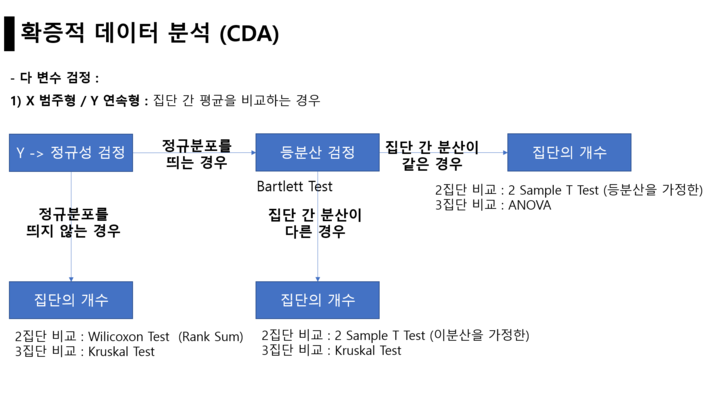

In [15]:
# 3. 각 Code_num(공정 배치그룹 - 같은 설비 공정이 진행되는 여러 그룹) 별 Z1-OP1 (공정 건조 온도 출력량)의 평균의 차이가 있는가?
df['Code_Num'].value_counts()

Code_Num
GroupD    31729
GroupC    26982
GroupB    13299
GroupF     7473
GroupA     7342
GroupE     6218
Name: count, dtype: int64

In [18]:
# D그룹과 C그룹의 Z1-OP1의 대표값의 차이가 있는지 확인?
# 해당 데이터를 D그룹 데이터와 C그룹 데이터로 추출
cond1 = df['Code_Num'] == 'GroupD'
cond2 = df['Code_Num'] == 'GroupC'
df_c = df.loc[cond1]
df_d = df.loc[cond2]

In [20]:
# 3-1. 각 그룹에서 Z1-OP1 연속형 자료가 정규분포를 따르는지?
# 귀무 가설: 해당 데이터의 분포는 정규분포를 따른다
# 대립 가설: 해당 데이터의 분포는 정규분포를 따르지 않는다.

print(stats.normaltest(df_c['Z1-OP1']))
print(stats.normaltest(df_d['Z1-OP1']))
# 귀무가설 참 -> 정규분포를 따른다

NormaltestResult(statistic=np.float64(0.45941327604808013), pvalue=np.float64(0.7947667226435516))
NormaltestResult(statistic=np.float64(2.8668515001589796), pvalue=np.float64(0.23849051231867696))


In [22]:
# 3-2 정규성을 만족하는 두 집단의 Z1-OP1 연속형 자료의 분산이 서로 같은지?
# 귀무 가설: 두 집단의 분산은 서로 같다고 볼 수 있다.
# 대립 가설: 두 집단의 분산은 서로 다르다고 볼 수 있다.

stats.bartlett(df_c['Z1-OP1'], df_d['Z1-OP1'])
# 귀무가설 참 -> 두 집단의 분산은 서로 같다

BartlettResult(statistic=np.float64(0.15980353542672476), pvalue=np.float64(0.6893374613172697))

In [ ]:
px.histogram(df, x= 'Z1-OP1', color = 'Code_Num')

In [25]:
# 3-3. (정규성을 만족하고, 분산이 같은) 두 집단의 Z1-OP1값의 평균의 차이가 있는지 검정
# 귀무 가설: C그룹과 D그룹의 Z1-OP1의 평균의 차이는 없다고 볼 수 있다.
# 대립 가설: C그룹과 D그룹의 Z1-OP1의 평균의 차이가 있다.

stats.ttest_ind(df_c['Z1-OP1'], df_d['Z1-OP1']) # 2 sample T Test
# 귀무가설 참 -> 평균의 차이는 없다고 볼 수 있다.

TtestResult(statistic=np.float64(-0.08592110963765062), pvalue=np.float64(0.9315294234984884), df=np.float64(58709.0))

In [26]:
# 만약 정규분포를 따르고 분산이 다른 두 연속형 집단의 평균을 비교(이분산)
stats.ttest_ind(df_c['Z1-OP1'], df_d['Z1-OP1'], equal_var = False)

TtestResult(statistic=np.float64(-0.08593737481631428), pvalue=np.float64(0.9315165011373185), df=np.float64(57245.21660562384))

In [27]:
# 만약 정규분포를 따르지 않는 두 연속형 집단의 중앙값을 비교
# 귀무가설 : 두 집단의 연속형 자료의 중앙값이 같다고 볼 수 있다.
# 대립가설 : 두 집단의 연속형 자료의 중앙값이 다르다고 볼 수 있다.

stats.ranksums(df_c['Z1-OP1'], df_d['Z1-OP1'])

RanksumsResult(statistic=np.float64(-0.24968337353911604), pvalue=np.float64(0.8028322170361302))

In [28]:
# 4. A, E, F 그룹의 Z1-OP1값의 대표값의 차이가 있는지 확인

cond1 = df['Code_Num'] == 'GroupA'
cond2 = df['Code_Num'] == 'GroupE'
cond3 = df['Code_Num'] == 'GroupF'
df_a = df.loc[cond1]
df_e = df.loc[cond2]
df_f = df.loc[cond3]

# 귀무 가설: 해당 데이터의 분포는 정규분포를 따른다
# 대립 가설: 해당 데이터의 분포는 정규분포를 따르지 않는다.
print(stats.normaltest(df_a['Z1-OP1']))
print(stats.normaltest(df_e['Z1-OP1']))
print(stats.normaltest(df_f['Z1-OP1']))
# 귀무가설 참 -> 정규분포를 따른다

NormaltestResult(statistic=np.float64(3.671411795679153), pvalue=np.float64(0.1595008706997435))
NormaltestResult(statistic=np.float64(3.1395858023119314), pvalue=np.float64(0.20808827273562336))
NormaltestResult(statistic=np.float64(0.37943212967748347), pvalue=np.float64(0.8271939700559496))


In [29]:
# 4-2. 정규분포를 따르는 세 집다느이 연속형 자료들의 분산이 같은지 검정(등분산 검정)
# 귀무 가설: 해당 연속형 자료의 세 집단 모두 분산이 같다
# 대립 가설: 어떤 연속형 자료의 분산이 다르다.

stats.bartlett(df_a['Z1-OP1'], df_e['Z1-OP1'], df_f['Z1-OP1'])
# 귀무가설 참 -> 분산이 모두 같다

BartlettResult(statistic=np.float64(0.18947012177505165), pvalue=np.float64(0.9096138948449022))

In [30]:
# 4-3. 정규분포를 따르고 분산이 모두 같은 세 집단의 연속형 자료의 평균이 같은지 검정 (ANOVA)
# 귀무 가설 : 해당 연속형 자료의 세 집단 모두 평균이 같다
# 대립 가설: 해당 연속형 자료의 세 집단 중 하나라도 평균이 다르다.

stats.f_oneway(df_a['Z1-OP1'], df_e['Z1-OP1'], df_f['Z1-OP1'])
# 귀무가설 참 -> 세 집단 모두 평균이 같다

F_onewayResult(statistic=np.float64(2.034783349896693), pvalue=np.float64(0.13073453040417232))

In [31]:
# 정규분포를 따르지 않거나 정규분포이지만 분산이 서로 다른 3집단 이상을 비교
stats.kruskal(df_a['Z1-OP1'], df_e['Z1-OP1'], df_f['Z1-OP1'])

KruskalResult(statistic=np.float64(2.733894752112974), pvalue=np.float64(0.25488383769687734))

- **두 연속형 자료의 상관성을 확인 (X-연속형, Y-연속형)**
- 두 데이터가 서로 상관성이 있는가? (비례, 반비례 관계가 있는가?)
- 연속형 자료가 모두 정규분포를 따를 때 -> Pearson Test
- 연속형 자료중 하나라도 정규분포를 따르지 않을 때 -> Spearman Test

In [ ]:
# 5. 두 개의 공정건조온도 출력량이 서로 상관관계가 있는가? (Z1-OP1, Z1-OP2)
px.scatter(df, x = 'Z1-OP1', y = 'Z1-OP2')

In [34]:
# 5-1. 두 연속형 자료는 정규분포를 따르는가?
# 귀무가설: 해당 연속형 자료의 분포는 정규분포를 따른다.
# 대립가설: 해당 연속형 자료의 분포는 정규분포를 따르지 않는다.

print(stats.normaltest(df['Z1-OP1']))
print(stats.normaltest(df['Z1-OP2']))
# 귀무가설 참 -> 정규분포를 따른다

NormaltestResult(statistic=np.float64(2.18765496291767), pvalue=np.float64(0.3349320908928943))
NormaltestResult(statistic=np.float64(1.1121501227551858), pvalue=np.float64(0.573455429905634))


In [36]:
# 5-2. 정규분포를 따르는 두 연속형 자료는 서로 상관성이 있는가?
# 귀무 가설: 두 연속형 자료는 서로 상관성이 없다. -> 비례 반비례 관계가 아니다, 추이가 없다.
# 대립 가설: 두 연속형 자료는 서로 상관성이 있다. -> 비례 또는 반비례 관계이다, 추이가 있다.

stats.pearsonr(df['Z1-OP1'], df['Z1-OP2'])
# 귀무가설 참 -> 상관성이 없다.

PearsonRResult(statistic=np.float64(-0.0024234031909799317), pvalue=np.float64(0.4597851757502812))

In [ ]:
# 6. Tube Furnace CP(소입로의 가스 침탄량)과 ST(세정기 온도 값)서로 상관성이 있는가?
px.scatter(df, x = 'Tube Furnace CP', y = 'ST', trendline = 'ols')

In [39]:
# 6-1. 두 연속형 자료에 대한 정규성 검정
# 귀무가설: 해당 연속형 자료는 정규분포를 따른다.
# 대립가설: 해당 연속형 자료는 정규분포를 따르지 않는다.

print(stats.normaltest(df['Tube Furnace CP']))
print(stats.normaltest(df['ST'].dropna()))

# 귀무가설 기각 -> 정규분포를 따르지 않는다.

NormaltestResult(statistic=np.float64(46072.55461165357), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(3441.4905138133176), pvalue=np.float64(0.0))


In [42]:
# 두 연속형 자료에 대한 결측값을 처리한 뒤 검정을 수행
# df 데이터 프레임에서 분석에 필요한 두 항목만 뽑아 결측값을 제거
print(len(df))
df_clean = df[['Tube Furnace CP', 'ST']].dropna()

93043


In [45]:
# 6-2. 정규분포를 따르지 않는 두 연속형 자료의 상관성이 있는가?
# 귀무가설: 두 연속형 자료는 서로 상관성이 없다.
# 대립가설: 두 연속형 자료는 서로 상관성이 있다.

stats.spearmanr(df_clean['Tube Furnace CP'], df_clean['ST'])
# 귀무가설 기각 -> 서로 상관성이 있다.

SignificanceResult(statistic=np.float64(-0.008256910985147173), pvalue=np.float64(0.01178868290438504))